# Requirements

In [12]:
# Add as many imports as you need.

In [13]:
import pandas as pd

from VNP.packages.data_alalysis import *
from VNP.packages.data_preperation import *
from VNP.packages.missing_values import *
from VNP.packages.visualization import *
from VNP.packages.models import *
from VNP.packages.evaluation import *

# Laboratory Exercise - Run Mode (8 points)

## The Spotify Songs Dataset
The dataset consists of information on more than 30,000 songs obtained from the Spotify API, with various musical features and genres. The features include danceability, energy, loudness, speechiness, acousticness, instrumentalness, liveness, valence, tempo, and genre. Each feature provides insights into different aspects of the songs, such as danceability, intensity, loudness, presence of spoken words, acoustic nature, instrumental content, live performance likelihood, musical positiveness, tempo, and genre. All these features except 'genre' serve as input variables for potential analysis and modeling. The 'genre' attribute serves as the target variable, representing the song genre to be predicted. The dataset offers a comprehensive collection of attributes, making it suitable for exploring and understanding the musical characteristics of a diverse range of songs.

Load the dataset into a `pandas` data frame.

In [14]:
# Write your code here. Add as many boxes as you need.
df = pd.read_csv("./data/spotify_songs.csv")

Preprocess the input and the output variables appropriately.

In [15]:
df.sample(5)

danceability  energy  loudness  speechiness  acousticness  \
21226         0.762   0.727    -6.347       0.0697       0.02210   
30955         0.681     NaN    -3.167       0.0787       0.09920   
24792         0.607   0.696       NaN       0.0745       0.07460   
11619         0.303   0.865       NaN       0.0563       0.00562   
23677         0.508   0.521    -6.749       0.0377       0.41100   

       instrumentalness  liveness  valence    tempo  genre  
21226            0.0000     0.175      NaN  104.999  latin  
30955            0.0000     0.350    0.267  102.924    edm  
24792            0.0141     0.118    0.707   94.009    r&b  
11619               NaN       NaN      NaN  181.243   rock  
23677            0.0000     0.104    0.459      NaN    r&b

In [16]:
df.describe()

danceability        energy      loudness   speechiness  acousticness  \
count  29171.000000  21572.000000  25213.000000  30472.000000  31939.000000   
mean       0.655237      0.697964     -6.700534      0.107035      0.175157   
std        0.145108      0.180924      2.975182      0.101335      0.219659   
min        0.000000      0.000175    -36.624000      0.000000      0.000000   
25%        0.563000      0.582000     -8.149000      0.041100      0.015000   
50%        0.672000      0.721000     -6.164000      0.062500      0.080200   
75%        0.761000      0.839000     -4.632000      0.132000      0.254000   
max        0.983000      1.000000      1.275000      0.918000      0.994000   

       instrumentalness      liveness       valence         tempo  
count      26363.000000  29847.000000  25344.000000  26276.000000  
mean           0.083894      0.190442      0.510760    120.905999  
std            0.223003      0.154312      0.233063     26.968530  
min            0.000000      0.000000      0.000000      0.000000  
25%            0.000000      0.092900      0.330000     99.946000  
50%            0.000016      0.127000      0.512000    121.978000  
75%            0.004810      0.249000      0.694000    133.986250  
max            0.994000      0.994000      0.990000    220.252000

In [17]:
# Write your code here. Add as many boxes as you need.
df.info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      29171 non-null  float64
 1   energy            21572 non-null  float64
 2   loudness          25213 non-null  float64
 3   speechiness       30472 non-null  float64
 4   acousticness      31939 non-null  float64
 5   instrumentalness  26363 non-null  float64
 6   liveness          29847 non-null  float64
 7   valence           25344 non-null  float64
 8   tempo             26276 non-null  float64
 9   genre             32833 non-null  object 
dtypes: float64(9), object(1)
memory usage: 2.5+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      29171 non-null  float64
 1   energy            21

Explore the dataset using visualizations of your choice.

In [18]:
import seaborn as sns

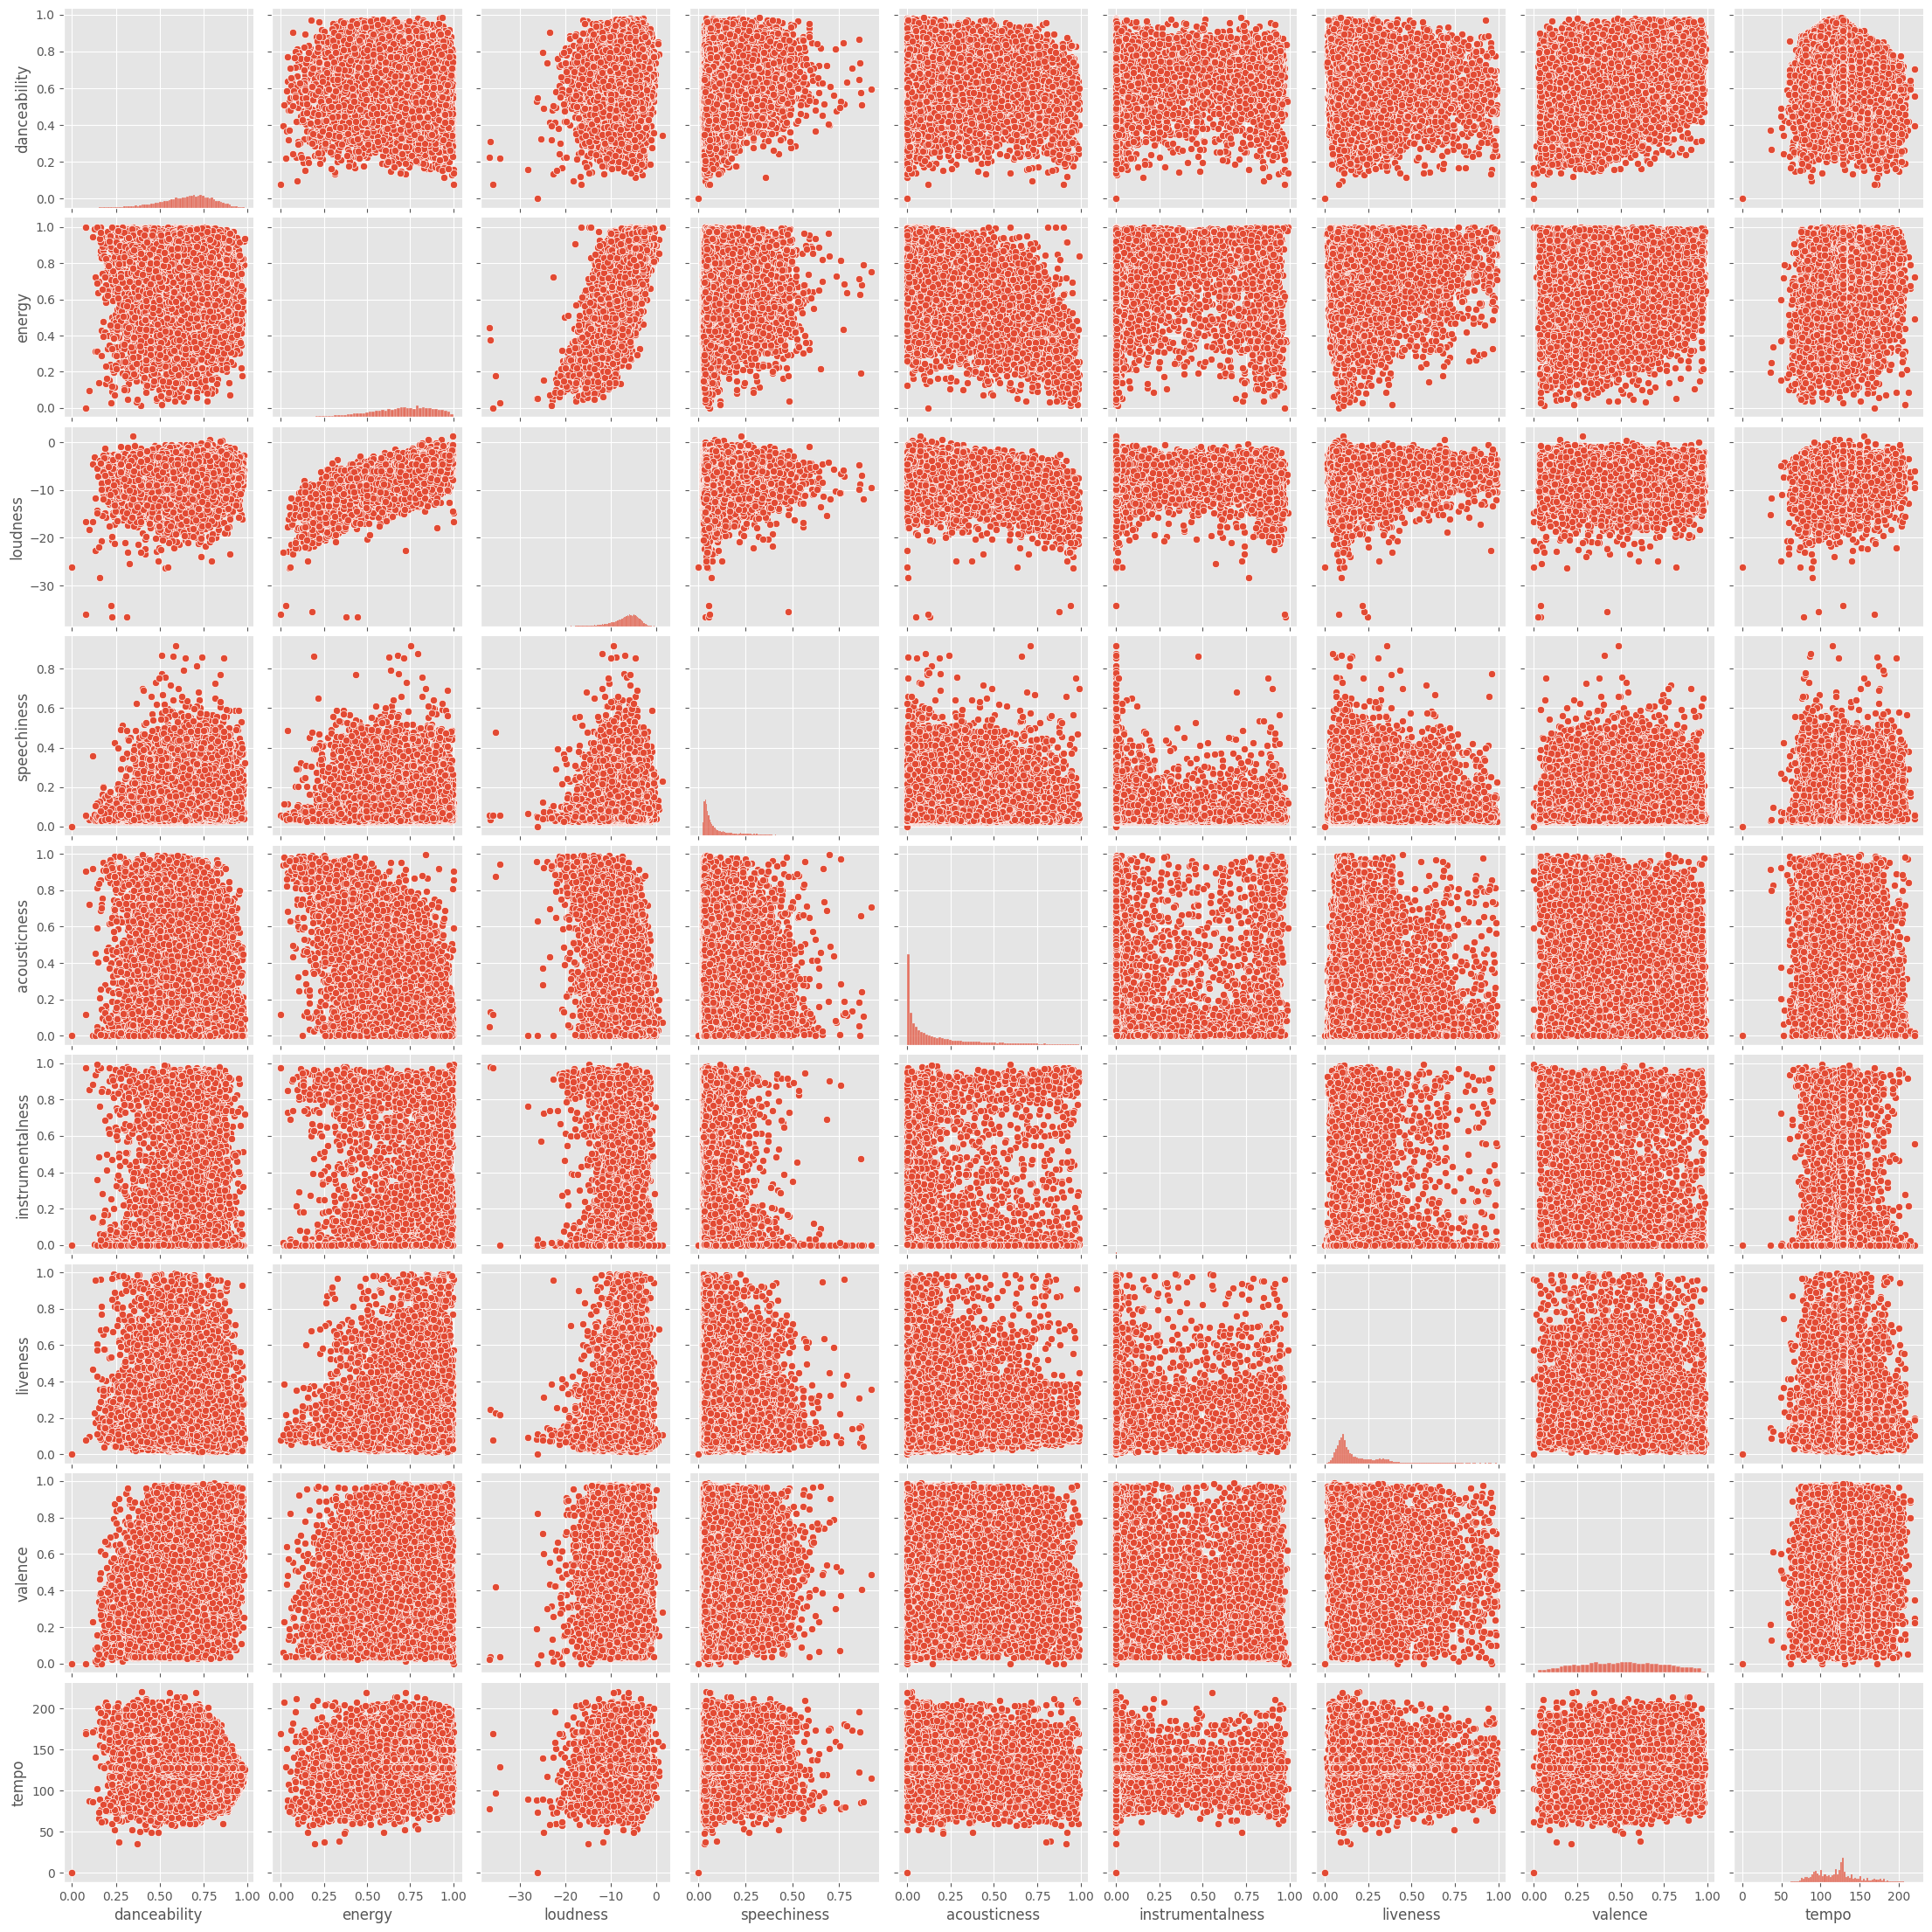

In [19]:
# Write your code here. Add as many boxes as you need.
sns.pairplot(df)

<Axes: >

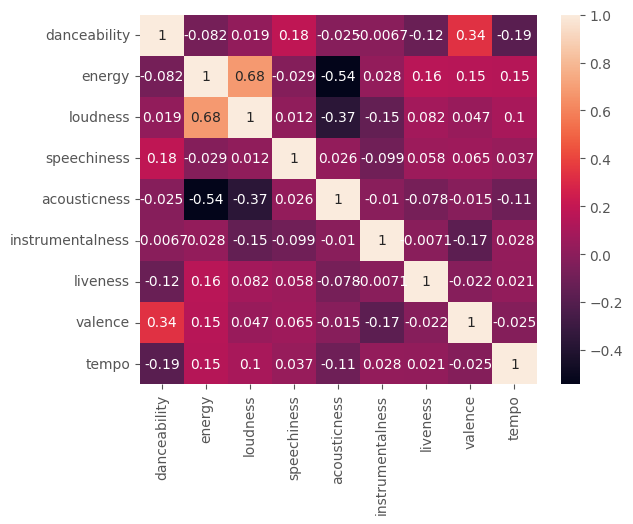

In [20]:
sns.heatmap(df.drop(columns="genre").corr(), annot=True)

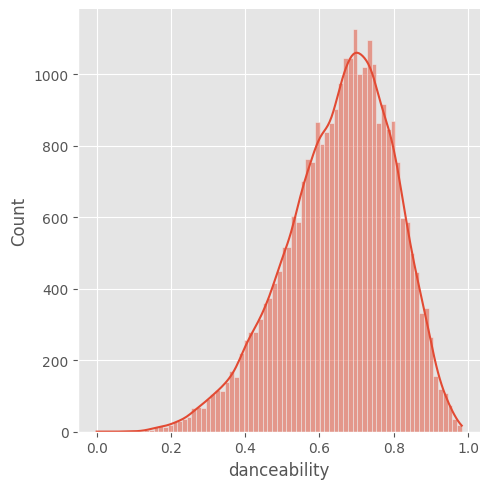

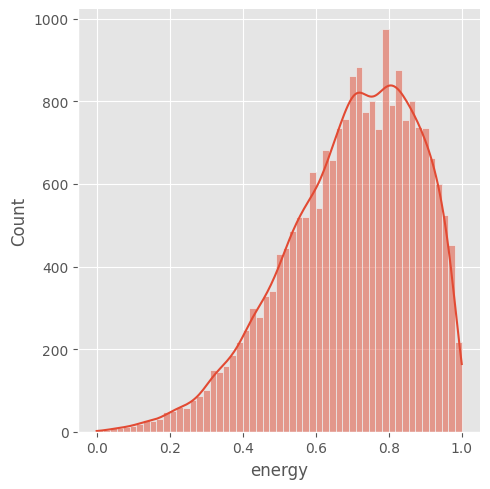

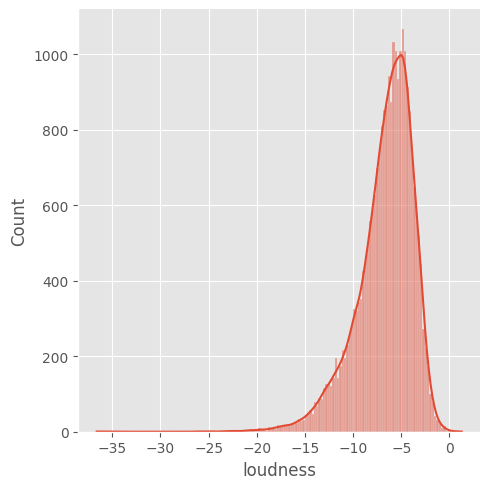

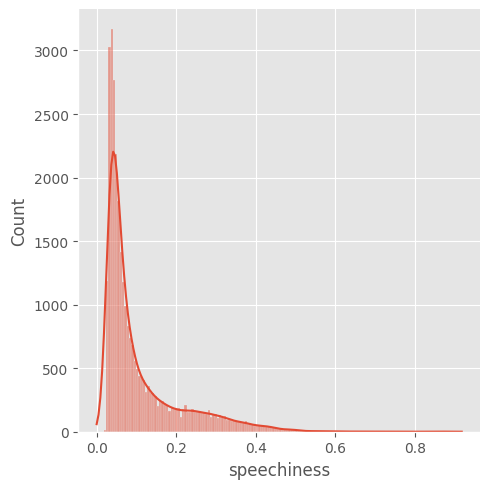

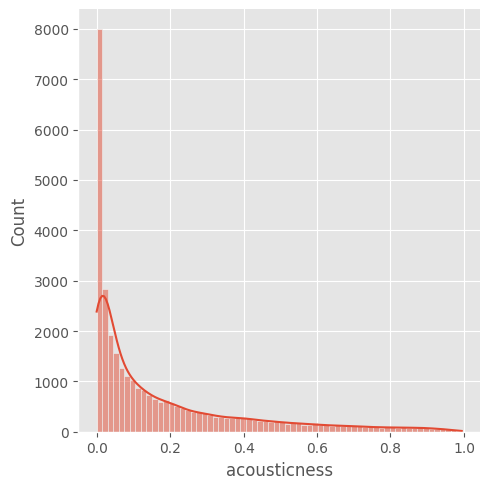

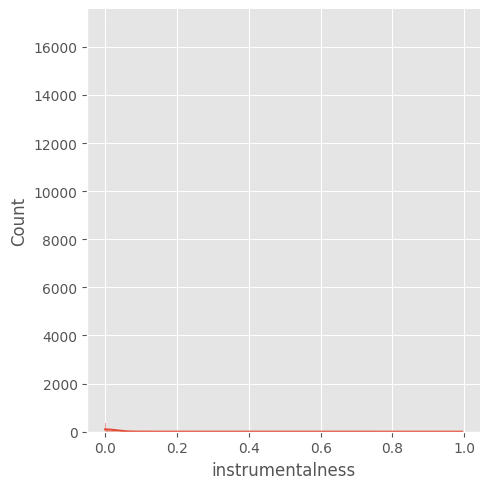

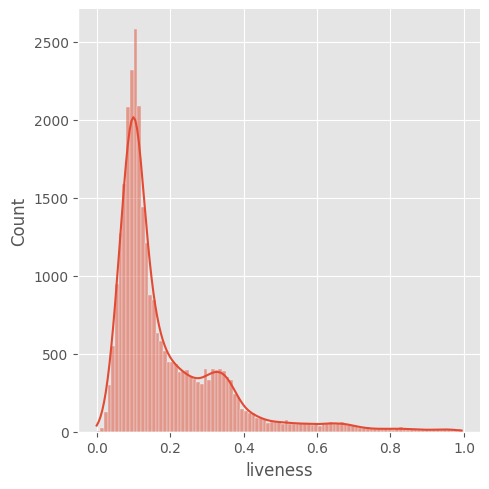

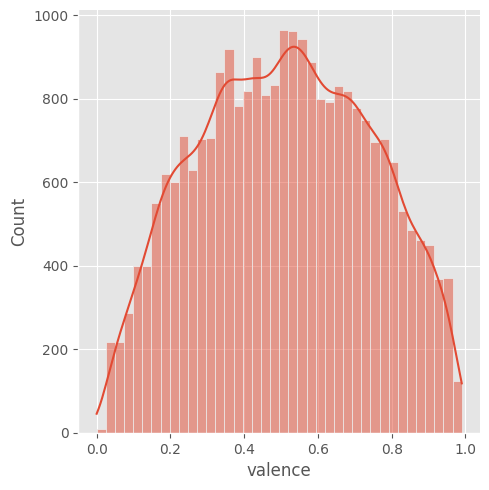

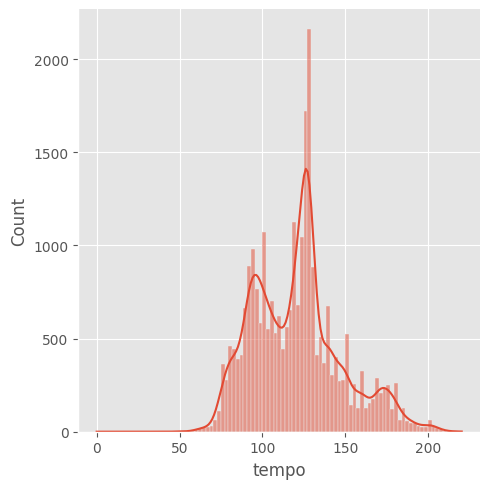

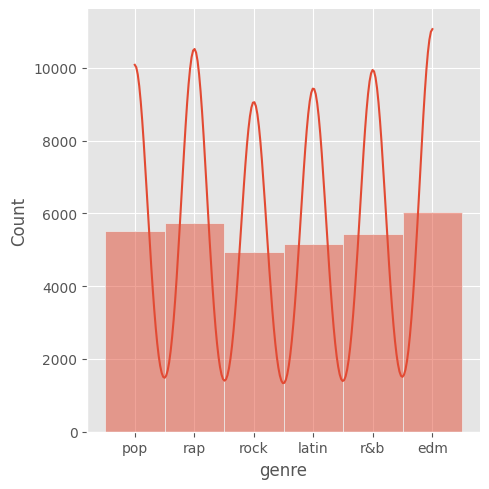

In [21]:
show_displots(df, columns=df.columns)

Check if the dataset is balanced.

In [22]:
# Write your code here. Add as many boxes as you need.
balance_table(df, target_column="genre")

Class  Count  Percentage  Total
0    edm   6043   18.405263  32833
1  latin   5155   15.700667  32833
2    pop   5507   16.772759  32833
3    r&b   5431   16.541285  32833
4    rap   5746   17.500685  32833
5   rock   4951   15.079341  32833

## Detecting Missing Values
Calculate the percentage of missing values present in each column of the dataset.

In [23]:
# Write your code here. Add as many boxes as you need.
missing_table(df)

Feature  CountMissing  PercentageMissing  Total
0      danceability          3662          11.153413  32833
1            energy         11261          34.297810  32833
2          loudness          7620          23.208357  32833
3       speechiness          2361           7.190936  32833
4      acousticness           894           2.722870  32833
5  instrumentalness          6470          19.705784  32833
6          liveness          2986           9.094509  32833
7           valence          7489          22.809369  32833
8             tempo          6557          19.970761  32833
9             genre             0           0.000000  32833

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import MinMaxScaler


def missing_table(data: pd.DataFrame):
    statistics_missing_table = data.isnull().sum().reset_index().rename(columns={"index": "Feature", 0: "CountMissing"})
    percentage_missing = (
        (statistics_missing_table["CountMissing"] / len(data) * 100).reset_index()).reset_index().rename(
        columns={"CountMissing": "PercentageMissing"})
    statistics_missing_table["PercentageMissing"] = percentage_missing["PercentageMissing"]
    statistics_missing_table["Total"] = len(data)
    return statistics_missing_table


def balance_table(data: pd.DataFrame, target_column):
    balance_table = data.groupby(target_column).size().reset_index().rename(
        columns={target_column: "Class", 0: "Count"})
    tmp = (balance_table["Count"] / len(data) * 100).reset_index().rename(
        columns={target_column: "Class", "Count": "Percentage"})
    balance_table["Percentage"] = tmp["Percentage"]
    balance_table["Total"] = len(data)
    return balance_table


def get_numerical_features_names(data: pd.DataFrame):
    result_columns = []
    for column in data.columns:
        if pd.api.types.is_numeric_dtype(data[column]):
            result_columns.append(column)

    return result_columns


def get_missing_features_name(data: pd.DataFrame):
    missing_values_features_names = []
    for column in data.columns:
        if len(data[data[column].isna()]) > 0:
            missing_values_features_names.append(column)
    return missing_values_features_names


def show_displots(data: pd.DataFrame, columns: list):
    for column in columns:
        sns.displot(data, x=column, kde=True)
        plt.show()


def show_displot_before_and_after_inputation(data_before: pd.DataFrame, data_after: pd.DataFrame, missing_feature_name):
    sns.displot(data_before[missing_feature_name], kde=True)
    plt.show()
    sns.displot(data_after[missing_feature_name], kde=True)
    plt.show()

def correlated_imputer(data: pd.DataFrame, correlated_columns: list, strategy="knn", n_neighbours=5):
    df_copy = data.copy()
    if strategy == "knn":
        knn_imputer = KNNImputer(n_neighbors=n_neighbours)
        normalizer = MinMaxScaler()
        normalized_values = normalizer.fit_transform(df_copy[correlated_columns])
        filled_with_knn = knn_imputer.fit_transform(normalized_values)
        imputed = normalizer.inverse_transform(filled_with_knn)
    elif strategy == "mice":
        mice = IterativeImputer()
        imputed = mice.fit_transform(df_copy[correlated_columns])

    df_copy[correlated_columns] = imputed

    return df_copy

def uncorrelated_imputer(data: pd.DataFrame, missing_feature: str, strategy="mean", const_value=-1):
    df_copy = data.copy()
    if strategy != "const":
        fill_value = getattr(df_copy[missing_feature], strategy)()
        if strategy == "mode":
            fill_value = fill_value[0]
        df_copy[missing_feature] = df_copy[missing_feature].fillna(fill_value)
    else:
        df_copy[missing_feature] = df_copy[missing_feature].fillna(const_value)
    return df_copy


In [25]:
def impute_data(data:pd.DataFrame, data_to_impute:list, strategies:list):
    if len(data_to_impute) != len(strategies):
        return "Differenet lengts"
    data_copy = data.copy()
    for impute_data, strategie in zip(data_to_impute, strategies):
        if strategie == "mice" or strategie == "knn":
            data_copy = correlated_imputer(data_copy, impute_data, strategie)
        else:
            if len(impute_data) != 1:
                return "Impute failed: Uncorrelated imputing with multiple data"
            data_copy = uncorrelated_imputer(data_copy, impute_data[0], strategie)
    return data_copy
    

In [32]:
def encode_data(data:pd.DataFrame, features_to_encode:list):
    encoders = {}
    data_copy = data.copy()
    for feature in features_to_encode:
        encoder = OrdinalEncoder()
        data_copy[[feature]] = encoder.fit_transform(data_copy[[feature]])
        encoders[feature] = encoder
    return data_copy, encoders
        

In [33]:
def show_ba_displots_pairwise(data_before : pd.DataFrame, data_after: pd.DataFrame, features:list):
    for feature in features:
        show_displot_before_and_after_inputation(data_before, data_after, missing_feature_name=feature)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      29171 non-null  float64
 1   energy            21572 non-null  float64
 2   loudness          25213 non-null  float64
 3   speechiness       30472 non-null  float64
 4   acousticness      31939 non-null  float64
 5   instrumentalness  26363 non-null  float64
 6   liveness          29847 non-null  float64
 7   valence           25344 non-null  float64
 8   tempo             26276 non-null  float64
 9   genre             32833 non-null  object 
dtypes: float64(9), object(1)
memory usage: 2.5+ MB


In [88]:
def get_categorical_features_names(data:pd.DataFrame, target_feature=None):
    categorical_features = []
    for column in data.columns:
        if target_feature is not None and column == target_feature:
            continue
        
        if not pd.api.types.is_any_real_numeric_dtype(data[column]):
            categorical_features.append(column)
    return categorical_features

In [90]:
get_categorical_features_names(df, "genre")

[]

In [75]:
df

danceability  energy  loudness  speechiness  acousticness  \
0             0.748   0.916    -2.634       0.0583      0.102000   
1             0.726     NaN    -4.969       0.0373      0.072400   
2             0.675   0.931    -3.432       0.0742      0.079400   
3             0.718   0.930    -3.778       0.1020      0.028700   
4             0.650   0.833    -4.672       0.0359      0.080300   
...             ...     ...       ...          ...           ...   
32828         0.428     NaN    -1.814       0.0936      0.076600   
32829         0.522   0.786    -4.462       0.0420      0.001710   
32830         0.529   0.821    -4.899       0.0481      0.108000   
32831         0.626     NaN       NaN       0.1090      0.007920   
32832         0.603   0.884    -4.571          NaN      0.000133   

       instrumentalness  liveness  valence    tempo genre  
0              0.000000    0.0653   0.5180  122.036   pop  
1                   NaN    0.3570   0.6930   99.972   pop  
2                   NaN    0.1100   0.6130  124.008   pop  
3              0.000009    0.2040   0.2770      NaN   pop  
4              0.000000    0.0833   0.7250  123.976   pop  
...                 ...       ...      ...      ...   ...  
32828          0.000000    0.0668   0.2100  128.170   edm  
32829          0.004270    0.3750   0.4000  128.041   edm  
32830               NaN    0.1500   0.4360  127.989   edm  
32831          0.127000    0.3430   0.3080  128.008   edm  
32832               NaN    0.7420   0.0894  127.984   edm  

[32833 rows x 10 columns]

In [26]:
missing_table(df)

Feature  CountMissing  PercentageMissing  Total
0      danceability          3662          11.153413  32833
1            energy         11261          34.297810  32833
2          loudness          7620          23.208357  32833
3       speechiness          2361           7.190936  32833
4      acousticness           894           2.722870  32833
5  instrumentalness          6470          19.705784  32833
6          liveness          2986           9.094509  32833
7           valence          7489          22.809369  32833
8             tempo          6557          19.970761  32833
9             genre             0           0.000000  32833

In [28]:
not_missing_data = impute_data(df, [["speechiness","danceability"],
                                    ["danceability", "valence"],
                                    ["energy", "acousticness", "loudness"],
                                    ["instrumentalness"],
                                    ["liveness", "energy"],
                                    ["tempo", "danceability"]], ["mice", "mice","knn","median","knn","knn" ])

In [29]:
missing_table(not_missing_data)

Feature  CountMissing  PercentageMissing  Total
0      danceability             0                0.0  32833
1            energy             0                0.0  32833
2          loudness             0                0.0  32833
3       speechiness             0                0.0  32833
4      acousticness             0                0.0  32833
5  instrumentalness             0                0.0  32833
6          liveness             0                0.0  32833
7           valence             0                0.0  32833
8             tempo             0                0.0  32833
9             genre             0                0.0  32833

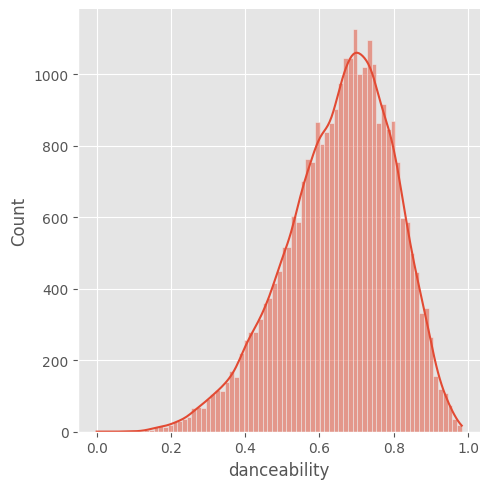

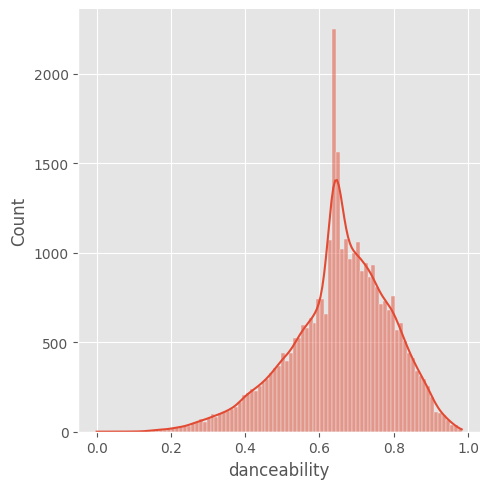

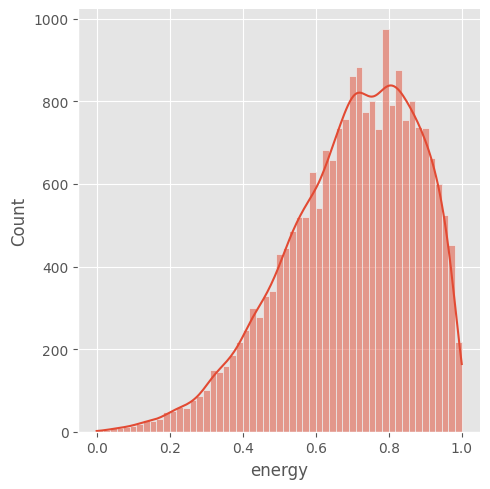

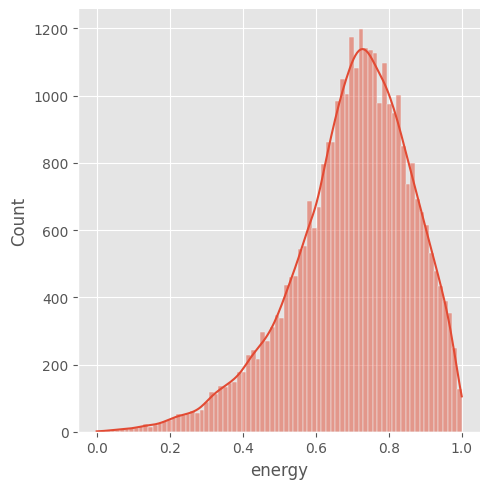

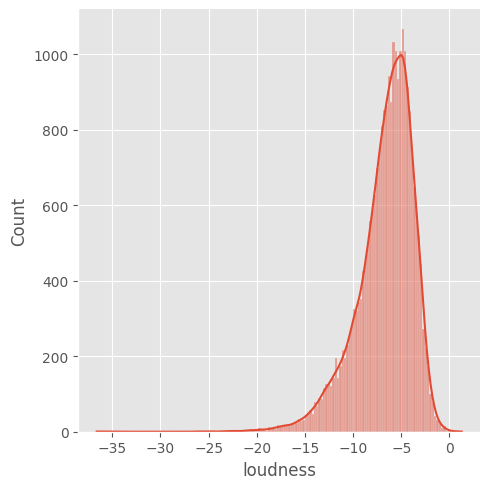

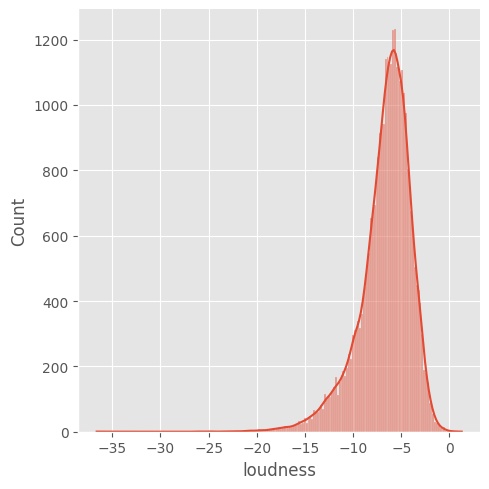

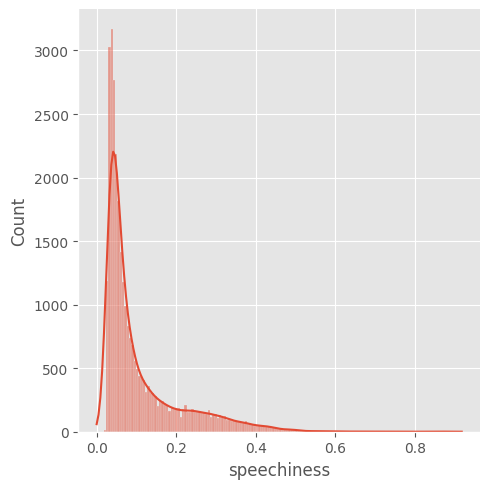

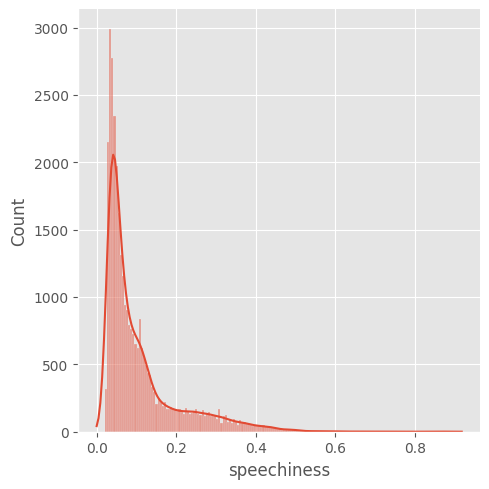

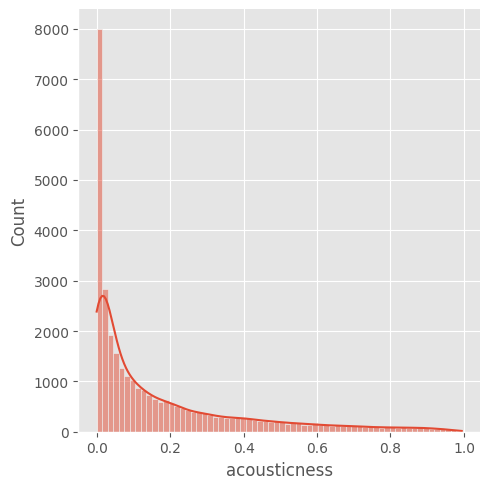

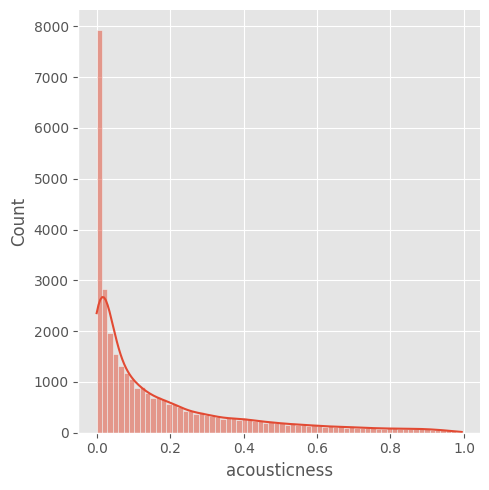

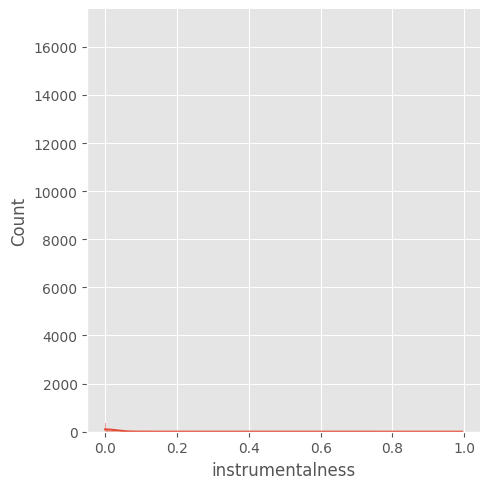

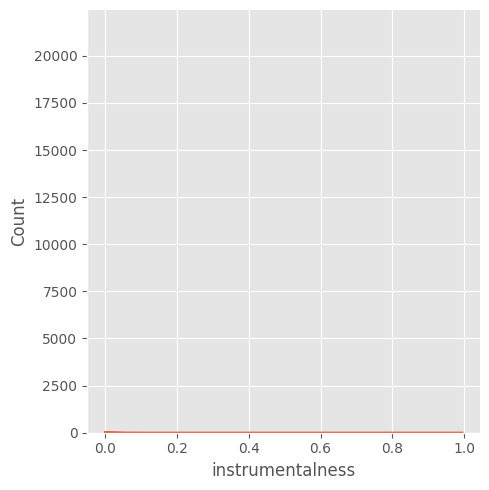

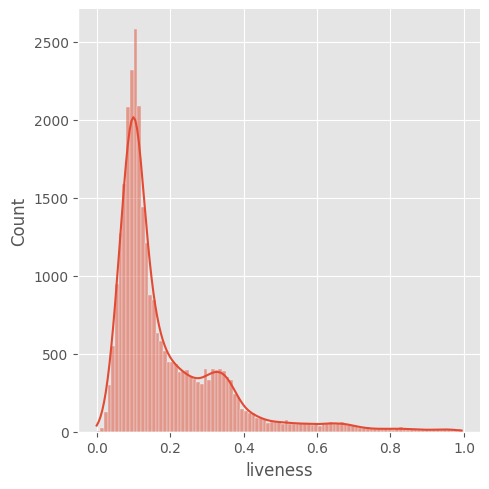

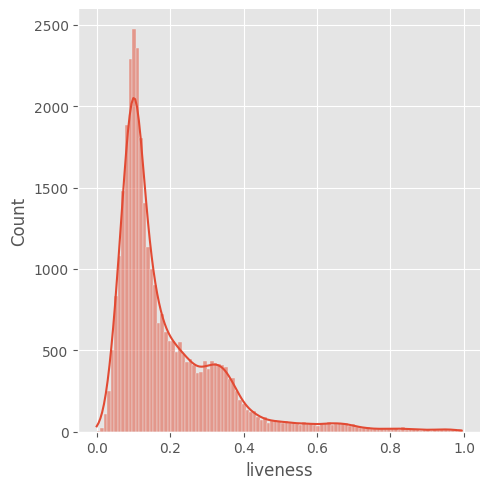

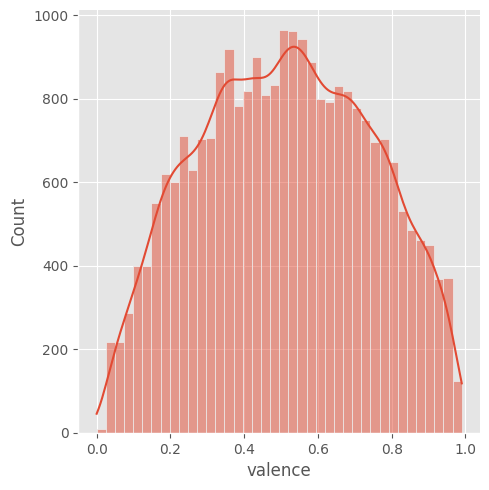

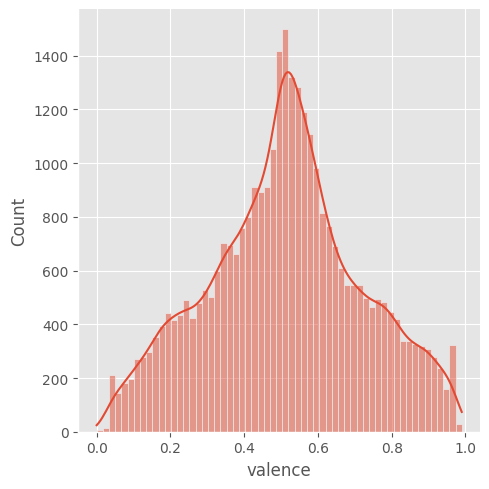

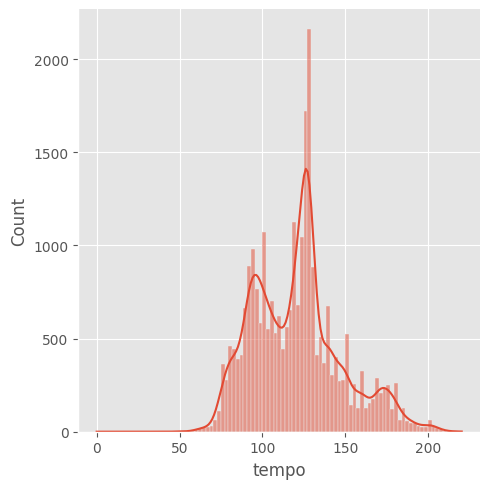

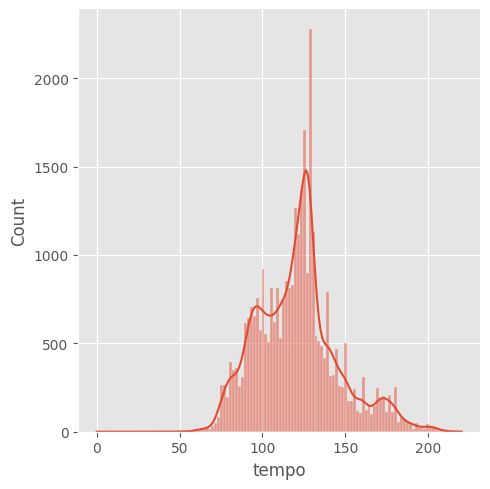

In [34]:
show_ba_displots_pairwise(df, not_missing_data, get_missing_features_name(df))

In [12]:
df_copy = df.dropna(subset="acousticness", axis=0)

In [13]:
missing_table(df_copy)

Feature  CountMissing  PercentageMissing  Total
0      danceability          3566          11.165033  31939
1            energy         10956          34.302890  31939
2          loudness          7413          23.209869  31939
3       speechiness          2301           7.204358  31939
4      acousticness             0           0.000000  31939
5  instrumentalness          6304          19.737625  31939
6          liveness          2904           9.092332  31939
7           valence          7280          22.793450  31939
8             tempo          6388          20.000626  31939
9             genre             0           0.000000  31939

<Axes: >

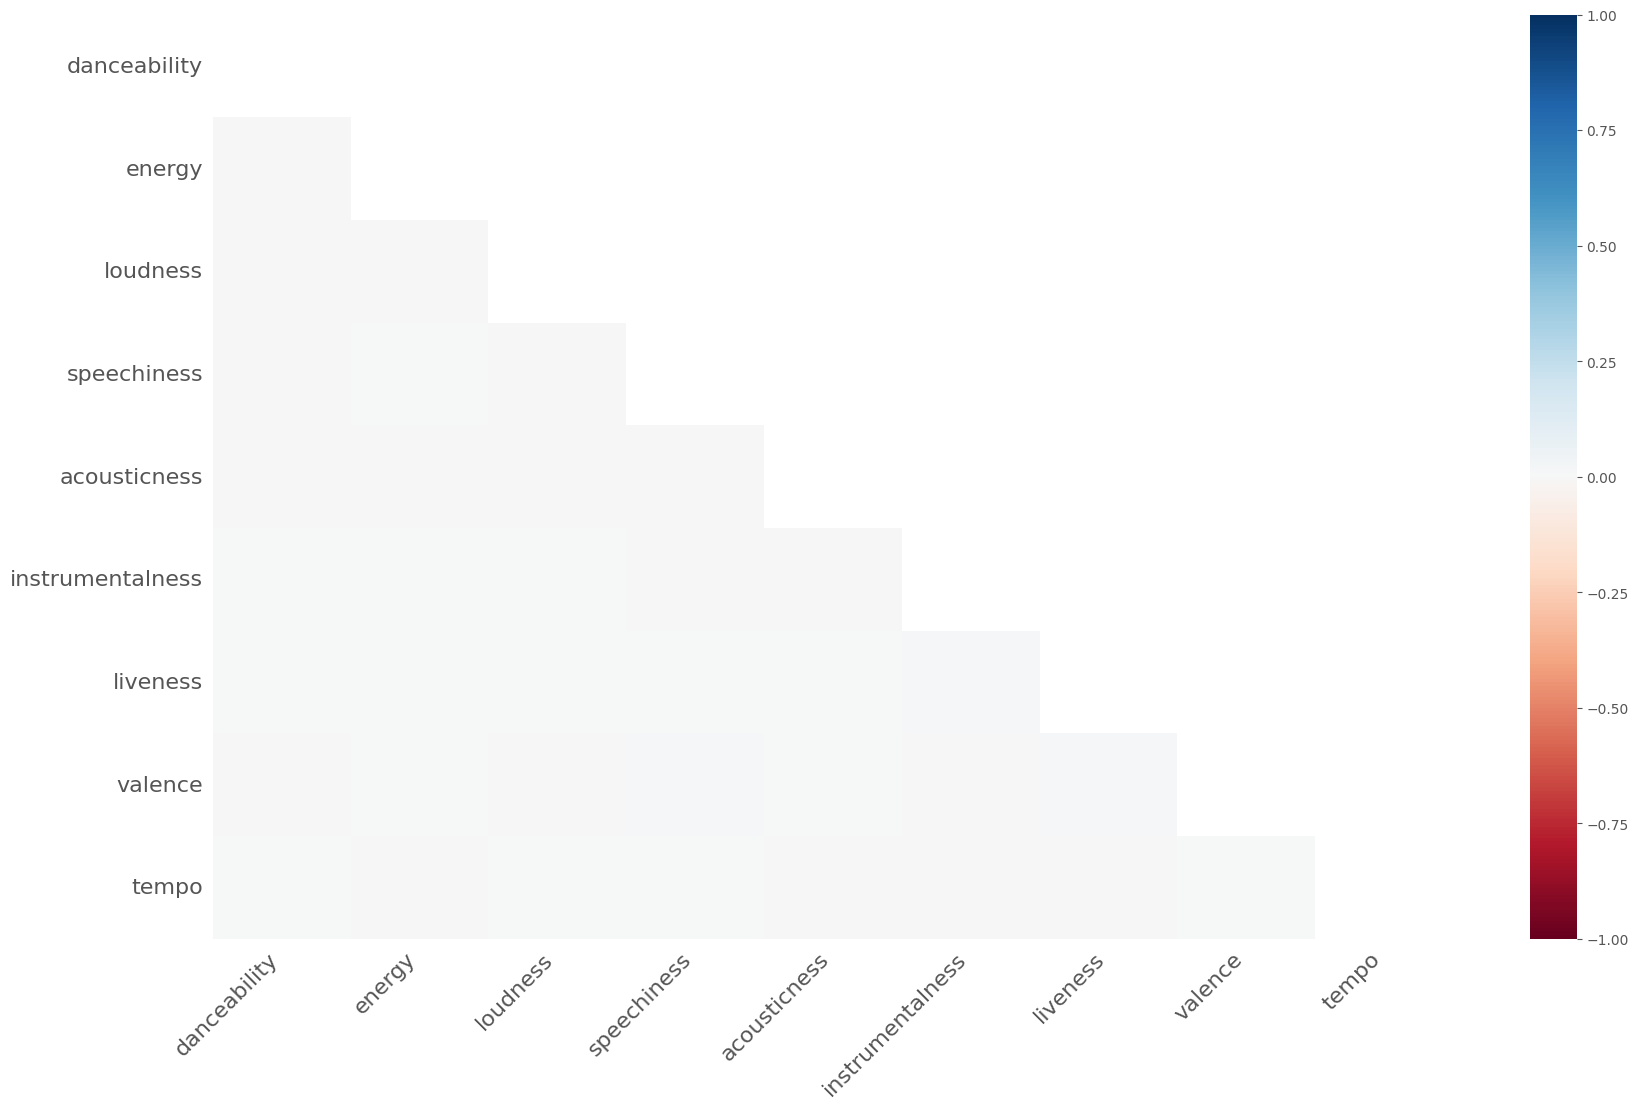

In [14]:
msno.heatmap(df)

<Axes: >

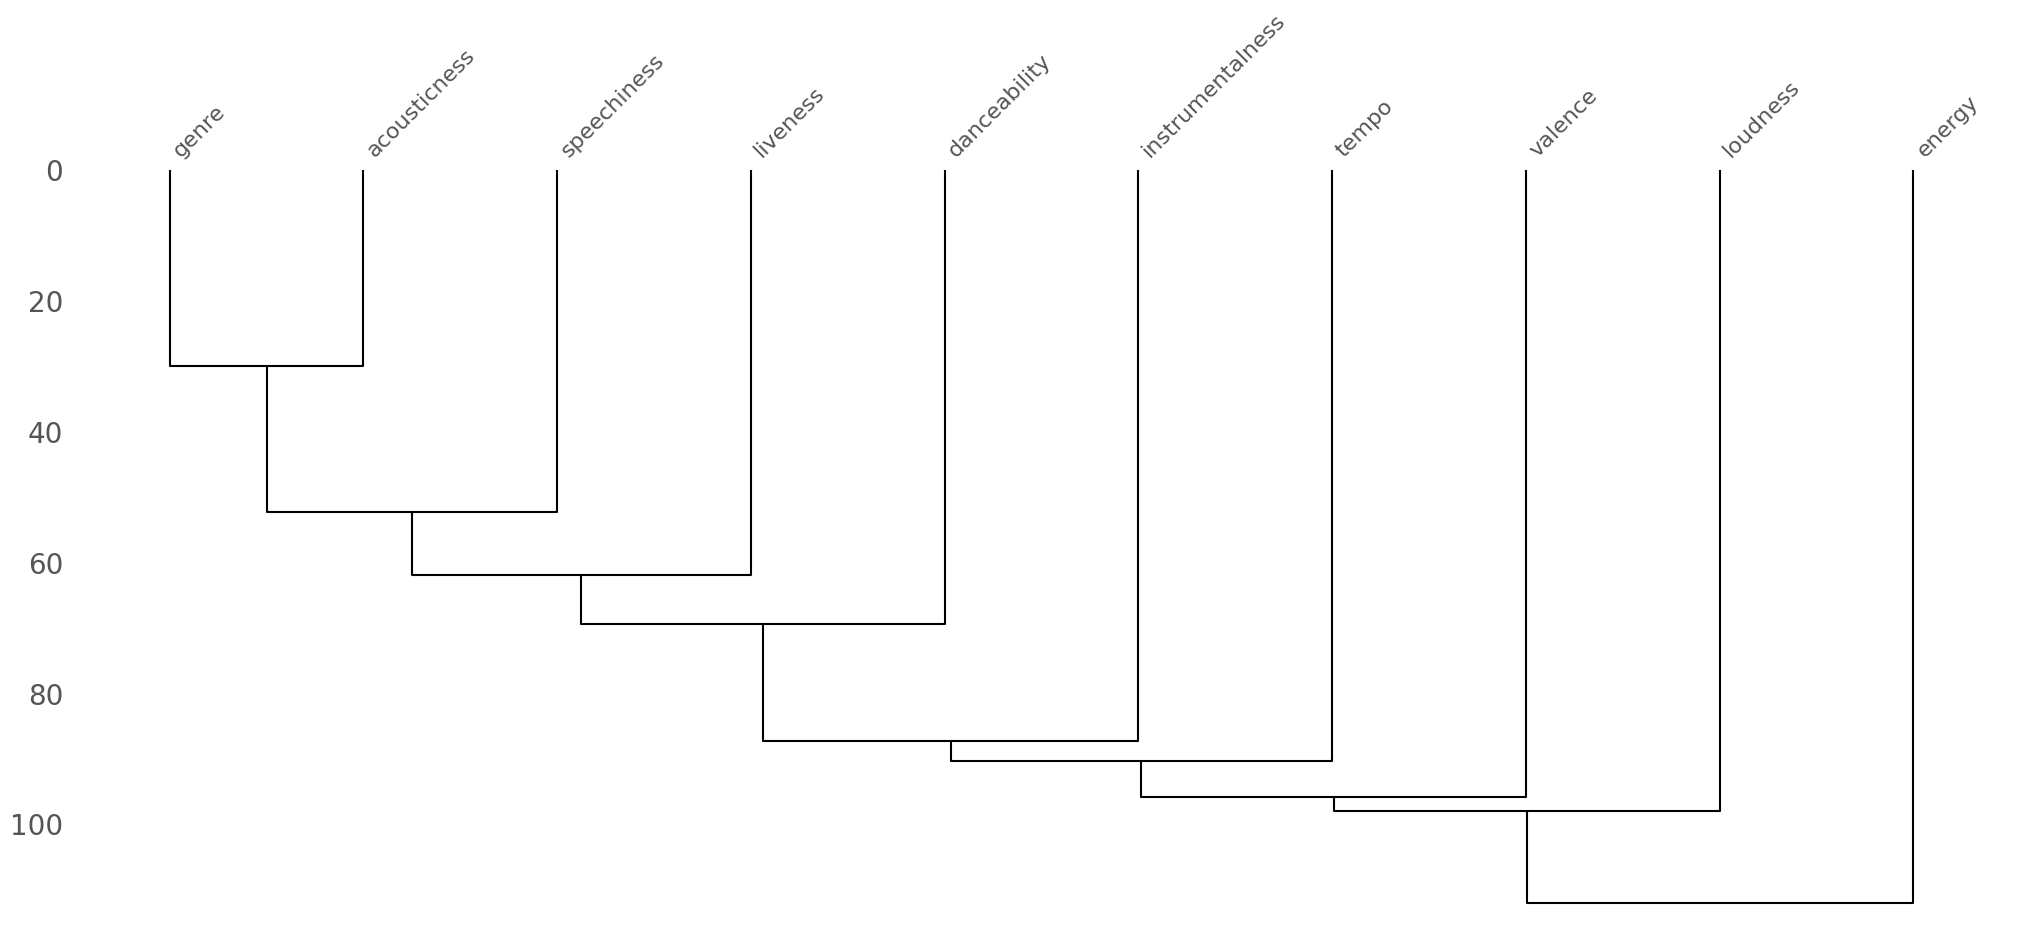

In [15]:
msno.dendrogram(df)

## Understanding the Causes Behind Missing Values
Using visualization tools such as heatmaps, and dendrograms, illustrate the interdependence between attributes with missing values. Also, visualize the distribution of the missing values within the dataset using matrices and bar charts.

In [16]:
df.columns

Index(['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'genre'],
      dtype='object')

In [17]:
# Write your code here. Add as many boxes as you need.
# df_copy =  uncorrelated_imputer(df, missing_feature="speechiness", strategy="median")
df_copy =  correlated_imputer(df, correlated_columns=["speechiness","danceability"], strategy="mice")
df_copy =  correlated_imputer(df_copy, correlated_columns=["danceability", "valence"], strategy="mice")


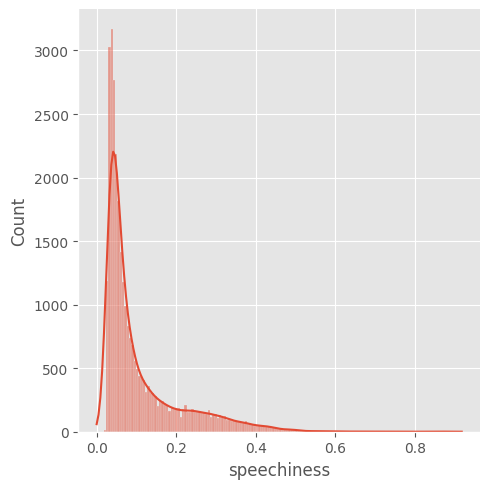

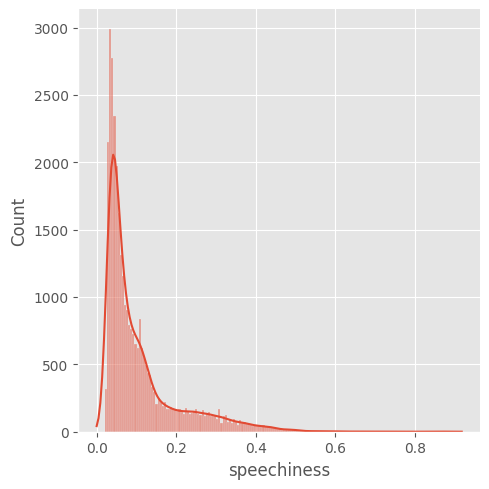

In [18]:
show_displot_before_and_after_inputation(df, df_copy, missing_feature_name="speechiness")

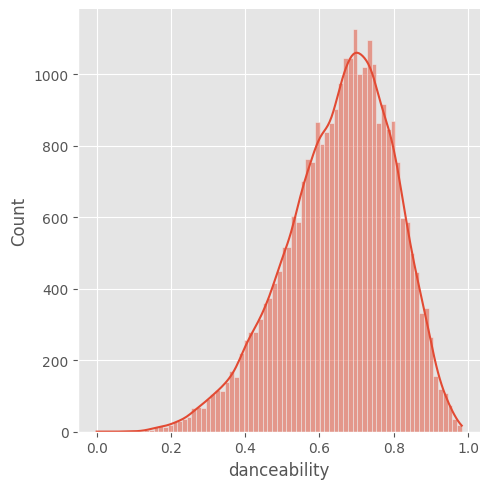

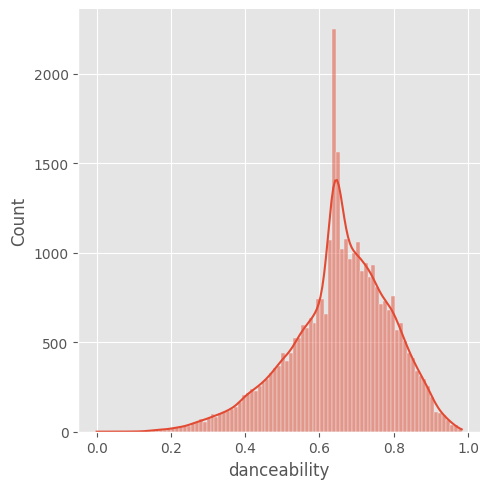

In [19]:
show_displot_before_and_after_inputation(df, df_copy, missing_feature_name="danceability")


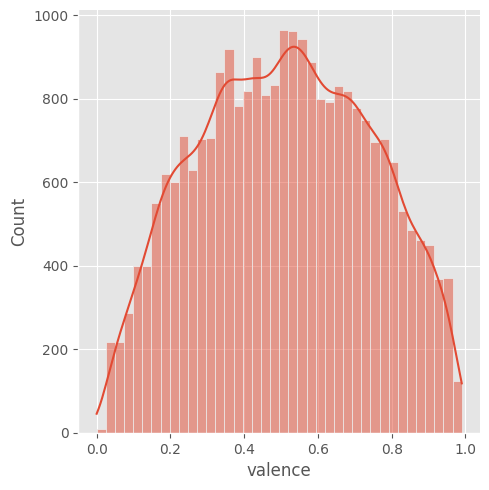

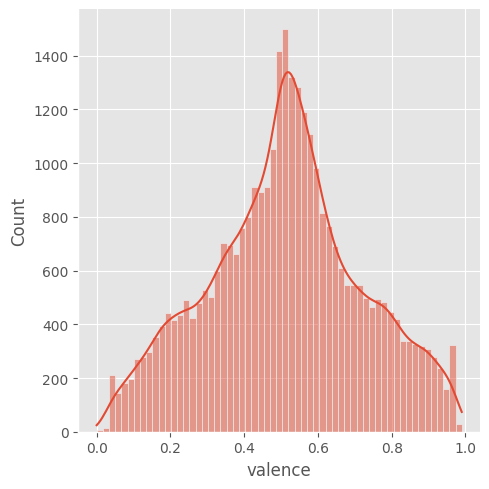

In [20]:
show_displot_before_and_after_inputation(df, df_copy, missing_feature_name="valence")


In [21]:
missing_table(df_copy)

Feature  CountMissing  PercentageMissing  Total
0      danceability             0           0.000000  32833
1            energy         11261          34.297810  32833
2          loudness          7620          23.208357  32833
3       speechiness             0           0.000000  32833
4      acousticness           894           2.722870  32833
5  instrumentalness          6470          19.705784  32833
6          liveness          2986           9.094509  32833
7           valence             0           0.000000  32833
8             tempo          6557          19.970761  32833
9             genre             0           0.000000  32833

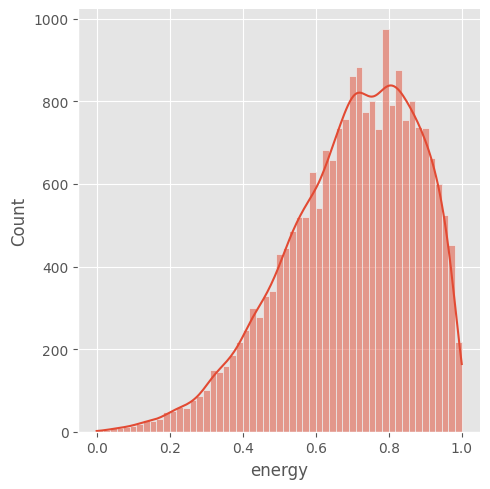

In [22]:
show_displots(df_copy, columns=["energy"])

In [23]:
df.columns

Index(['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'genre'],
      dtype='object')

In [24]:
# df_copy1 = uncorrelated_imputer(df_copy, missing_feature="energy", strategy="median")
df_copy1 = correlated_imputer(df_copy, correlated_columns=["energy", "acousticness", "loudness"], strategy="knn", n_neighbours=5)

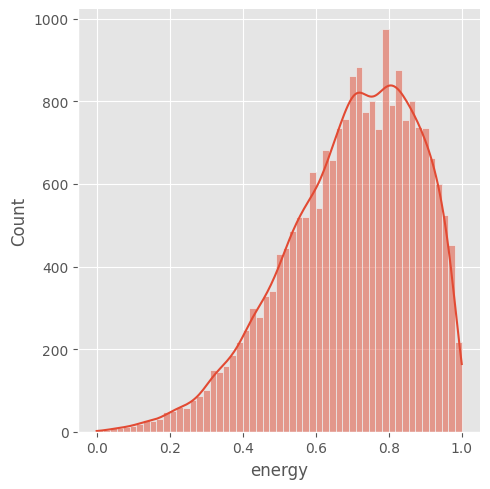

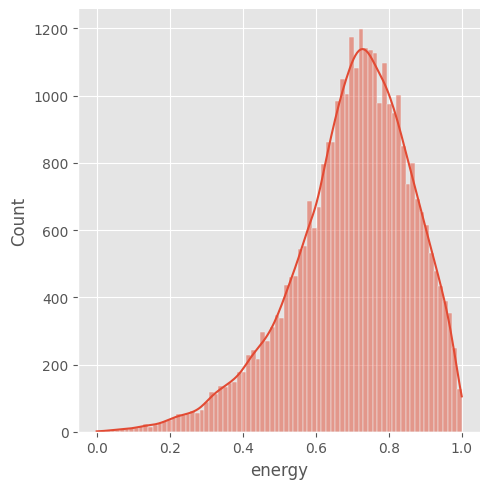

In [25]:
show_displot_before_and_after_inputation(df_copy, df_copy1, missing_feature_name="energy")

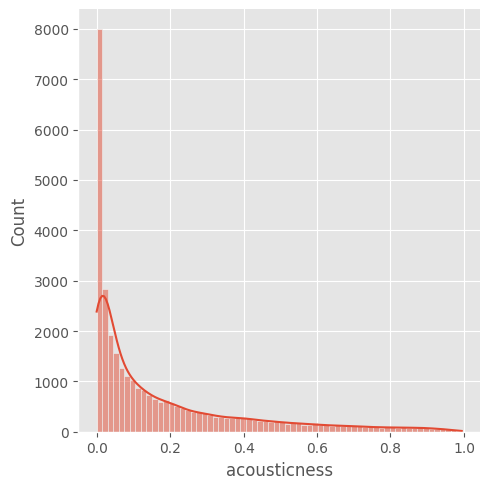

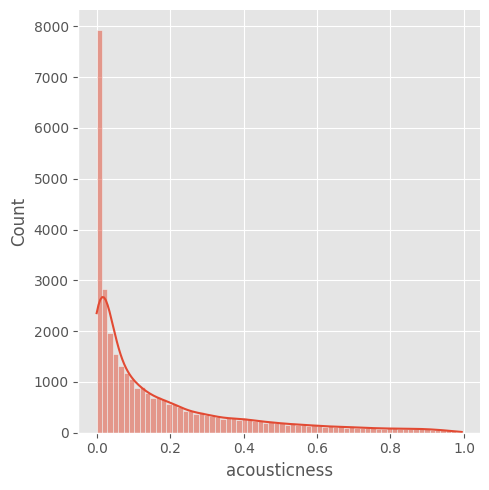

In [26]:
show_displot_before_and_after_inputation(df_copy, df_copy1, missing_feature_name="acousticness")

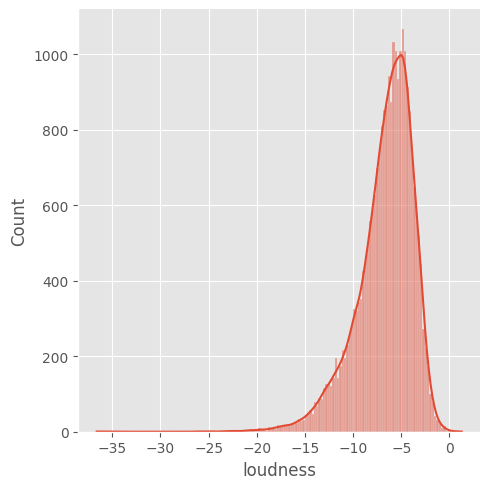

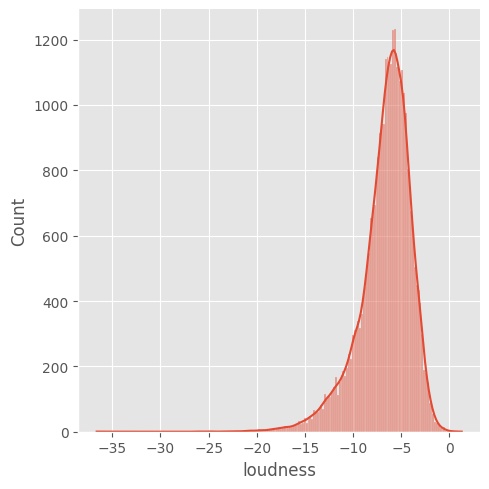

In [27]:
show_displot_before_and_after_inputation(df_copy, df_copy1, missing_feature_name="loudness")

In [28]:
missing_table(df_copy1)

Feature  CountMissing  PercentageMissing  Total
0      danceability             0           0.000000  32833
1            energy             0           0.000000  32833
2          loudness             0           0.000000  32833
3       speechiness             0           0.000000  32833
4      acousticness             0           0.000000  32833
5  instrumentalness          6470          19.705784  32833
6          liveness          2986           9.094509  32833
7           valence             0           0.000000  32833
8             tempo          6557          19.970761  32833
9             genre             0           0.000000  32833

<Axes: >

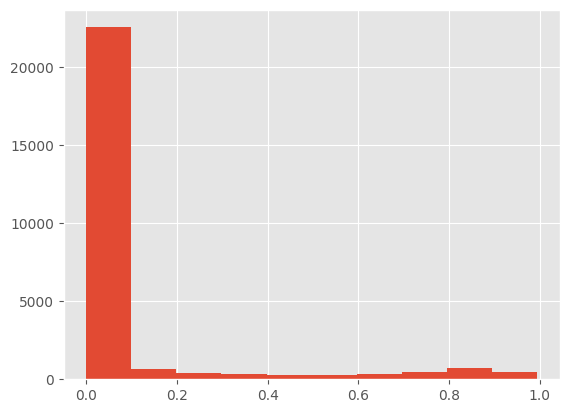

In [29]:
df_copy1["instrumentalness"].hist()

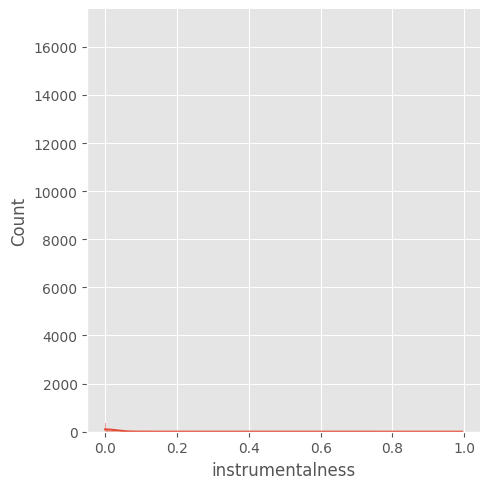

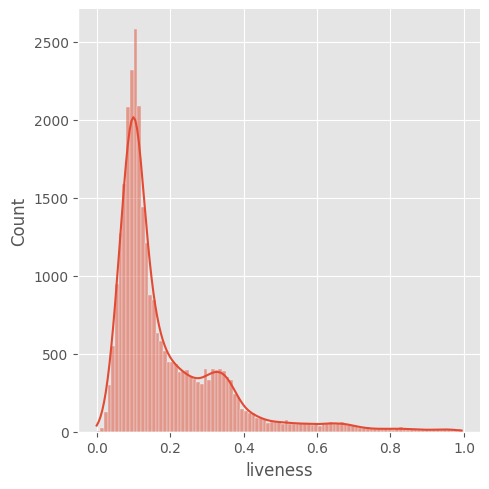

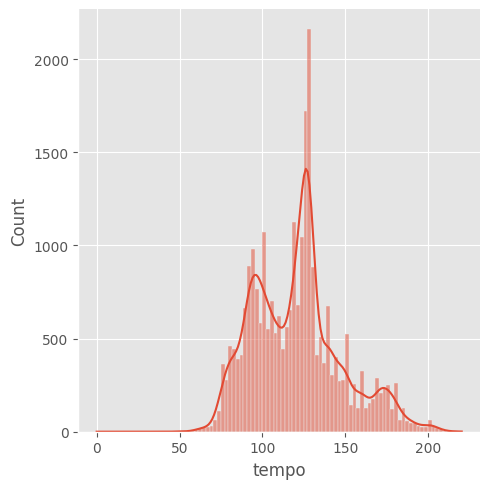

In [30]:
show_displots(df_copy1, columns=["instrumentalness", "liveness", "tempo"])

In [31]:
df_copy2 = uncorrelated_imputer(df_copy1, missing_feature="instrumentalness", strategy="median")

<Axes: >

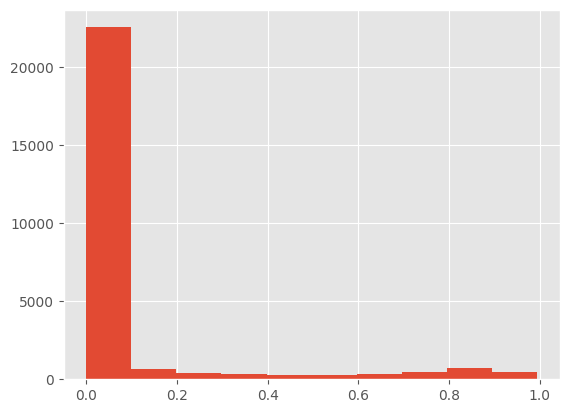

In [32]:
df_copy1["instrumentalness"].hist()


<Axes: >

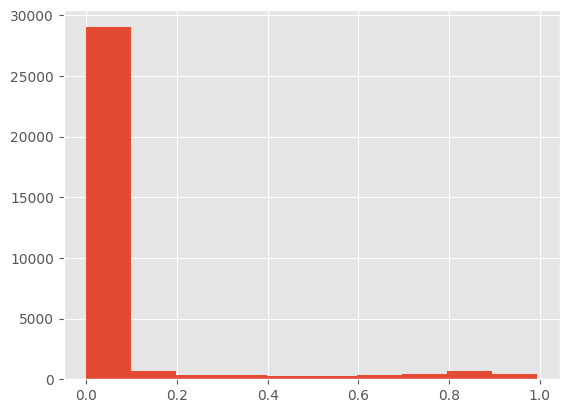

In [33]:
df_copy2["instrumentalness"].hist()

In [34]:
df_copy3 = correlated_imputer(df_copy2, correlated_columns=["liveness", "energy"],  strategy="knn")


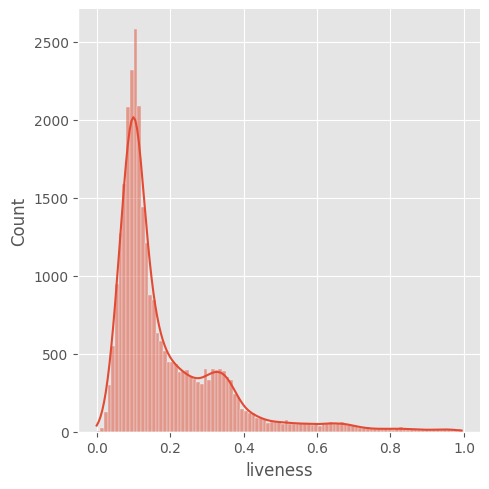

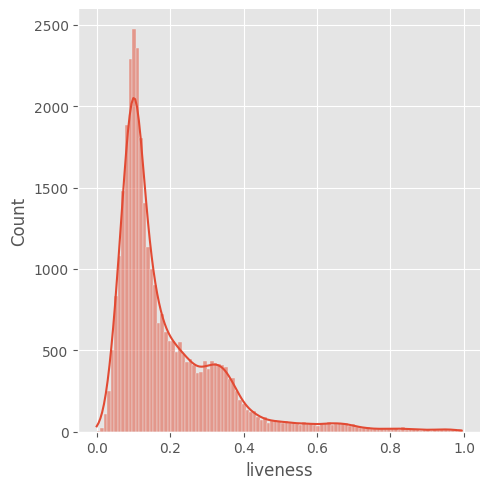

In [35]:
show_displot_before_and_after_inputation(df_copy2, df_copy3, missing_feature_name="liveness")

In [36]:
df.columns

Index(['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'genre'],
      dtype='object')

In [37]:
df_copy4 = correlated_imputer(df_copy3, correlated_columns=["tempo", "danceability"], strategy="knn")

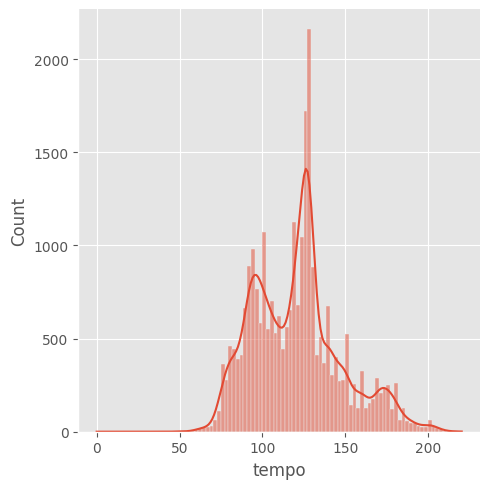

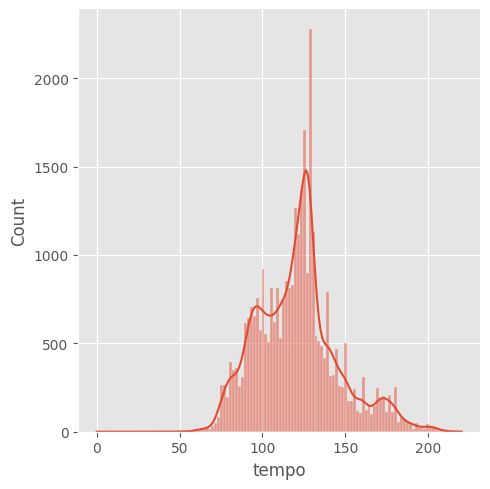

In [38]:
show_displot_before_and_after_inputation(df_copy3, df_copy4, missing_feature_name="tempo")

In [39]:
missing_table(df_copy4)

Feature  CountMissing  PercentageMissing  Total
0      danceability             0                0.0  32833
1            energy             0                0.0  32833
2          loudness             0                0.0  32833
3       speechiness             0                0.0  32833
4      acousticness             0                0.0  32833
5  instrumentalness             0                0.0  32833
6          liveness             0                0.0  32833
7           valence             0                0.0  32833
8             tempo             0                0.0  32833
9             genre             0                0.0  32833

## Handling the Missing Values
Handle the missing values using suitable method based on the insights obtained from the various visualizations.

In [40]:
# Write your code here. Add as many boxes as you need.

## Dataset Splitting
Partition the dataset into training and testing sets with an 80:20 ratio.

In [41]:
# Write your code here. Add as many boxes as you need.
X = df_copy4.drop(columns="genre")
Y = df_copy4["genre"]

In [42]:
x_train,x_test,y_train,y_test = train_test_split(X, Y, random_state=0, shuffle=True, test_size=0.2)

In [43]:
X

danceability  energy  loudness  speechiness  acousticness  \
0             0.748  0.9160   -2.6340     0.058300      0.102000   
1             0.726  0.7222   -4.9690     0.037300      0.072400   
2             0.675  0.9310   -3.4320     0.074200      0.079400   
3             0.718  0.9300   -3.7780     0.102000      0.028700   
4             0.650  0.8330   -4.6720     0.035900      0.080300   
...             ...     ...       ...          ...           ...   
32828         0.428  0.6388   -1.8140     0.093600      0.076600   
32829         0.522  0.7860   -4.4620     0.042000      0.001710   
32830         0.529  0.8210   -4.8990     0.048100      0.108000   
32831         0.626  0.8808   -4.3962     0.109000      0.007920   
32832         0.603  0.8840   -4.5710     0.099451      0.000133   

       instrumentalness  liveness  valence     tempo  
0              0.000000    0.0653   0.5180  122.0360  
1              0.000016    0.3570   0.6930   99.9720  
2              0.000016    0.1100   0.6130  124.0080  
3              0.000009    0.2040   0.2770  116.9626  
4              0.000000    0.0833   0.7250  123.9760  
...                 ...       ...      ...       ...  
32828          0.000000    0.0668   0.2100  128.1700  
32829          0.004270    0.3750   0.4000  128.0410  
32830          0.000016    0.1500   0.4360  127.9890  
32831          0.127000    0.3430   0.3080  128.0080  
32832          0.000016    0.7420   0.0894  127.9840  

[32833 rows x 9 columns]

## Feature Scaling
Standardize the features appropriately.

In [44]:
standard_scaler = StandardScaler()
standard_scaler.fit(x_train)

StandardScaler()

In [45]:
x_train_stand = standard_scaler.transform(x_train)

In [46]:
# type(x_train_stand)

In [47]:
x_train_stand=  pd.DataFrame(x_train_stand, columns=x_train.columns)
x_train_stand

danceability    energy  loudness  speechiness  acousticness  \
0         -0.642609 -1.132216 -0.486858     1.720393      1.661866   
1          0.535775 -2.808565 -5.189874    -0.079528      3.553295   
2          1.194499 -1.380014 -0.102726     0.619025      1.721692   
3         -0.474269  0.565195  0.285443    -0.717913     -0.801641   
4          0.638243 -1.600553 -1.378274     2.209890      2.775554   
...             ...       ...       ...          ...           ...   
26261      0.016115  0.842728  1.062368    -0.381384     -0.794830   
26262      0.122813  0.843967  0.808800     0.619025     -0.576556   
26263      0.141592  1.037249 -0.005922     0.710806     -0.777204   
26264     -0.437673  0.949281  0.581285     3.627391     -0.727042   
26265     -0.171815 -0.717156  0.424888    -0.820911     -0.564591   

       instrumentalness  liveness   valence     tempo  
0              0.278886 -0.610190 -0.226235 -1.662043  
1             -0.333093 -0.409975  0.189273  0.956296  
2             -0.333093 -0.556800  0.114604 -1.171844  
3             -0.285443 -0.825755 -1.331373 -0.007939  
4             -0.332315  0.704555  0.225404 -1.333996  
...                 ...       ...       ...       ...  
26261         -0.331219  0.991530  0.796759  2.368335  
26262         -0.333093 -0.188270  0.043659  0.312799  
26263         -0.333158 -0.156370  0.479701  1.500095  
26264         -0.333174 -0.456692 -1.725293 -0.036739  
26265         -0.332755 -0.728317 -1.480294  0.742146  

[26266 rows x 9 columns]

In [48]:
x_test_stand = standard_scaler.transform(x_test)
x_test_stand=  pd.DataFrame(x_test_stand, columns=x_train.columns)
x_test_stand

danceability    energy  loudness  speechiness  acousticness  \
0        -0.020481  1.014947  0.463859    -0.709755     -0.801416   
1         0.704116 -1.212750 -0.338680     1.485842      1.657264   
2         1.187180  0.506963 -1.889080     0.955554     -0.788939   
3         1.099350  0.160047  0.714858     0.557838      0.212230   
4        -0.554779 -0.027040  0.355459    -0.331415      1.169450   
...            ...       ...       ...          ...           ...   
6562      0.118583 -2.612805 -0.931685    -0.664884      1.045195   
6563     -1.052482  1.376731  0.516994    -0.470105     -0.787329   
6564      1.275010  0.534221  0.907878    -0.033637     -0.721060   
6565     -1.630696  1.351952  0.975399    -0.654686     -0.800596   
6566      0.499179 -0.636622  0.064607    -0.762784     -0.270982   

      instrumentalness  liveness   valence     tempo  
0            -0.333167  0.217365  0.162643  0.153022  
1            -0.333093 -0.590169 -0.442650 -1.175868  
2             3.970991 -0.396628  0.418963  0.355581  
3            -0.327744 -0.243129  1.426071  2.209966  
4            -0.333174  0.753141 -0.360983  0.998676  
...                ...       ...       ...       ...  
6562         -0.332557 -0.652903 -0.159219  0.045371  
6563         -0.151037 -0.329889  0.498917  0.649701  
6564         -0.333155 -0.679598  1.349208  0.194596  
6565         -0.333174 -1.097380 -0.702061  2.084640  
6566         -0.297388 -0.913182  1.320385 -0.454382  

[6567 rows x 9 columns]

In [49]:
balance_table(df_copy4, target_column="genre")

Class  Count  Percentage  Total
0    edm   6043   18.405263  32833
1  latin   5155   15.700667  32833
2    pop   5507   16.772759  32833
3    r&b   5431   16.541285  32833
4    rap   5746   17.500685  32833
5   rock   4951   15.079341  32833

In [50]:
# Write your code here. Add as many boxes as you need.
# tree_classifier = DecisionTreeClassifier( criterion="log_loss")
tree_classifier = RandomForestClassifier()
tree_classifier.fit(x_train_stand, y_train)


RandomForestClassifier()

In [51]:
predict = tree_classifier.predict(x_test_stand)

In [52]:
predict_train = tree_classifier.predict(x_train_stand)

In [53]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

         edm       0.62      0.63      0.62      1242
       latin       0.42      0.33      0.37      1026
         pop       0.31      0.28      0.29      1092
         r&b       0.40      0.37      0.38      1078
         rap       0.53      0.61      0.57      1146
        rock       0.58      0.69      0.63       983

    accuracy                           0.49      6567
   macro avg       0.48      0.49      0.48      6567
weighted avg       0.48      0.49      0.48      6567



In [54]:
# print(classification_report(y_train, predict_train))

In [55]:
confusion_matrix(y_test, predict)

array([[783,  76, 178,  53,  85,  67],
       [120, 342, 178, 147, 172,  67],
       [156, 161, 305, 171,  95, 204],
       [ 58, 121, 153, 399, 241, 106],
       [ 83,  91,  68, 157, 696,  51],
       [ 67,  27, 104,  80,  22, 683]])

(## Model Selection

Choose and train an approriate model for the given task.

In [56]:
# Write your code here. Add as many boxes as you need.

Use the trained model to make predictions for the test set.

In [57]:
# Write your code here. Add as many boxes as you need.

Assess the performance of the model by using different classification metrics.

In [58]:
# Write your code here. Add as many boxes as you need.

# Laboratory Exercise - Bonus Task (+ 2 points)

As part of the bonus task in this laboratory assignment, your objective is to fine-tune at least one hyper-parameter using a cross-validation with grid search. This involves systematically experimenting with various values for the hyper-parameter(s) and evaluating the model's performance using cross-validation. Upon determining the most suitable value(s) for the hyper-parameter(s), evaluate the model's performance on a test set for final assessment.

Hint: Use the `GridCVSearch` from the `scikit-learn` library. Check the documentation at https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html.

## Dataset Splitting
Partition the dataset into training and testing sets with an 90:10 ratio.

In [59]:
# Write your code here. Add as many boxes as you need.

x_train1,x_test1, y_train1,y_test1 = train_test_split(X, Y, test_size=0.1, shuffle=True, random_state=0)


In [60]:
x_train1

danceability  energy  loudness  speechiness  acousticness  \
25577      0.633834  0.2940   -8.5330       0.0321       0.42200   
21827      0.667000  0.6270  -10.4880       0.0654       0.09720   
17917      0.645000  0.8210   -3.6790       0.2130       0.04920   
24385      0.817000  0.5366   -9.8390       0.1810       0.44400   
3199       0.684000  0.7812   -6.7300       0.0334       0.01090   
...             ...     ...       ...          ...           ...   
20757      0.658000  0.8368   -3.8030       0.0699       0.00217   
32103      0.672578  0.8370   -4.4940       0.1680       0.04960   
30403      0.675144  0.8682   -6.7142       0.1770       0.00600   
21243      0.596000  0.8540   -5.1140       0.4630       0.01690   
2732       0.632324  0.5850   -5.5402       0.0268       0.05220   

       instrumentalness  liveness   valence     tempo  
25577          0.000016   0.07490  0.358000   74.0380  
21827          0.000052   0.11100  0.784000  116.1452  
17917          0.000000   0.19300  0.844000  115.7852  
24385          0.000016   0.20500  0.504000   99.9320  
3199           0.090800   0.09860  0.761000  121.3328  
...                 ...       ...       ...       ...  
20757          0.000396   0.34100  0.677000  180.0330  
32103          0.000016   0.16422  0.520232  128.9590  
30403          0.000003   0.16900  0.611000  158.4598  
21243          0.000000   0.12400  0.152000  120.2740  
2732           0.000085   0.08330  0.203000  139.6270  

[29549 rows x 9 columns]

## Feature Scaling
Standardize the features appropriately.

In [61]:
# Write your code here. Add as many boxes as you need.

## Fine-tuning the Hyperparameters
Experiment with various values for the chosen hyperparameter(s) and evaluate the model's performance using cross-validation.

In [62]:
RandomForestClassifier().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [63]:
# Write your code here. Add as many boxes as you need.
params_grid = {
    "n_estimators": [100,200,300],
    "max_depth": [4,5,6],
    # "min_samples_leaf":[1,12,30,100]
}

In [64]:
grid_search_cv = GridSearchCV(RandomForestClassifier(), params_grid, scoring="accuracy", cv=5)

In [65]:
grid_search_cv.fit(x_train1,y_train1)

KeyboardInterrupt: 

## Final Assessment of the Model Performance
Upon determining the most suitable hyperparameter(s), evaluate the model's performance on a test set for final assessment.

In [66]:
# Write your code here. Add as many boxes as you need.
grid_search_cv.best_params_

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [67]:
grid_search_cv.best_score_

AttributeError: 'GridSearchCV' object has no attribute 'best_score_'

In [68]:
a = dict([("a",1),("b",2)])
a

{'a': 1, 'b': 2}